In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\ADMIN\Videos\tutorial\data science\deep learning\DL lessons\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df1 = df.copy()

In [6]:
df1.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Data Visualization

In [8]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


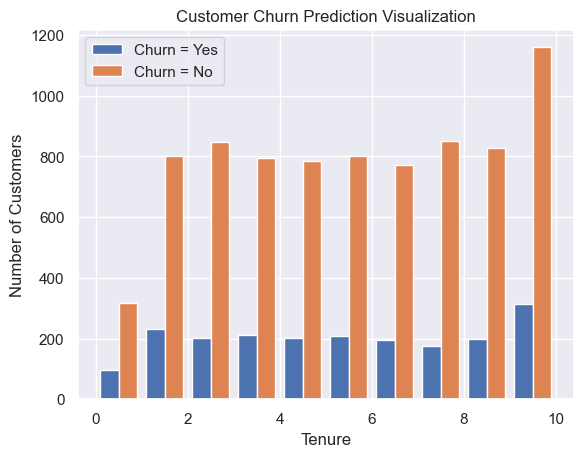

In [9]:
tenure_churn_no = df1[df1['Exited']==0].Tenure
tenure_churn_yes = df1[df1['Exited']==1].Tenure

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes,tenure_churn_no], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

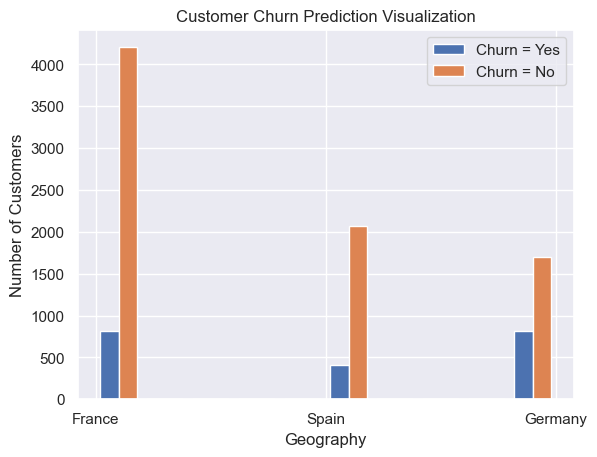

In [10]:
Geography_churn_no = df1[df1['Exited']==0].Geography
Geography_churn_yes = df1[df1['Exited']==1].Geography

plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([Geography_churn_yes,Geography_churn_no], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

In [11]:
def print_unique_col_values(df1):
    for column in df1:
        if df1[column].dtype=='object':
            print(f'{column}: {df1[column].unique()}')

In [12]:
print_unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [13]:
#replace female with 1 and male with 0 in the gender column
df1['Gender'].replace({'Female':1, 'Male': 0}, inplace = True)

In [14]:
#### one hot encode the Geography columns
df2 = pd.get_dummies(data = df1, columns = ['Geography'], dtype=int)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int32  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 898.6 KB


In [16]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Scale the remaining columns so that they are all in range 0-1 using MinMaxScaler

In [17]:
col_to_scale = ['Tenure','Age','CreditScore','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale]) 

In [18]:
for col in df2:
    print (f'{col}:{df2[col].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

### Split the dataset into Training and Test set

In [19]:
X = df2.drop('Exited', axis = 'columns')
y = df2['Exited']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [21]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [22]:
X_train.shape

(8000, 12)

In [23]:
X_test.shape

(2000, 12)

### Create the Deep learning model

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, input_shape=(12,), activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train,y_train, epochs=100)



Epoch 1/100


250/250 [==============================] - 5s 3ms/step - loss: 0.5805 - accuracy: 0.7610
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7941
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7959
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4875 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7958
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7958
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4759 - ac

In [26]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8525


[0.36147254705429077, 0.8525000214576721]

In [27]:
yp = model.predict(X_test)
yp[:10]

63/63 [==============================] - 0s 2ms/step


array([[0.07176076],
       [0.11163806],
       [0.09540369],
       [0.06638552],
       [0.12605421],
       [0.1873239 ],
       [0.04345623],
       [0.28130266],
       [0.04816197],
       [0.7168158 ]], dtype=float32)

In [28]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [29]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [31]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

### Print classification report

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1595
           1       0.81      0.35      0.49       405

    accuracy                           0.85      2000
   macro avg       0.83      0.67      0.70      2000
weighted avg       0.85      0.85      0.83      2000



Text(92.25, 0.5, 'Truth')

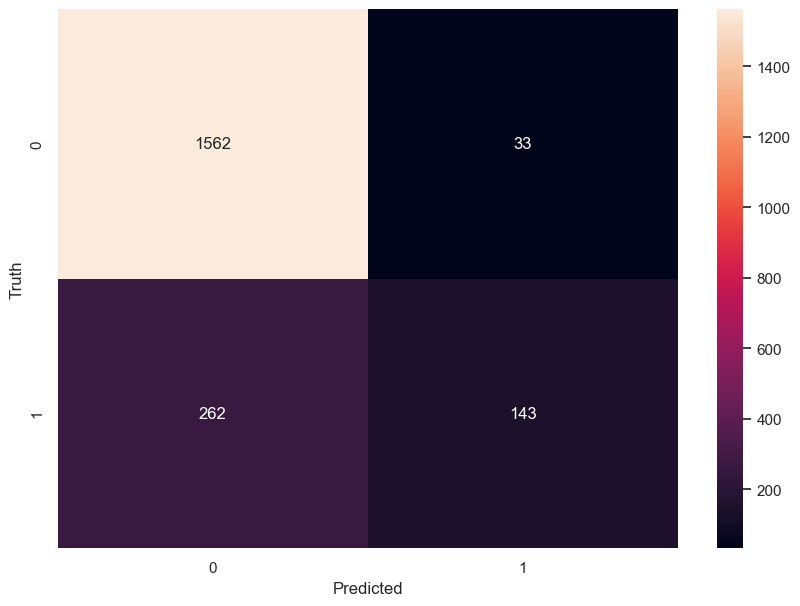

In [33]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')